In [ ]:
!pip install download
!pip install optuna
import os
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from IPython import display
import plotly as plotly
%matplotlib inline



import calendar
import datetime as dt
from datetime import timedelta, date
from pprint import pprint

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error


import joblib
import optuna
from optuna import Trial, visualization
from optuna.samplers import TPESampler

from scipy.stats import randint as sp_randint
from time import time
import pickle

import warnings
warnings.filterwarnings('ignore')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 365.3/365.3 KB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.2/212.2 KB 30.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 KB 12.0 MB/s eta 0:00:00


In [ ]:
# importing libraries
import os
import pandas as pd
import numpy as np
import glob
import psycopg2
import sqlalchemy
import shutil
import glob
import warnings
from __future__ import absolute_import, division, print_function, unicode_literals
import seaborn as sns

import matplotlib as mpl
import matplotlib.pyplot as plt

from datetime import datetime

import plotly.express as px


warnings.filterwarnings("ignore")

In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from download import download

mpl.rcParams['figure.figsize'] = (8,6)
mpl.rcParams['axes.grid'] = False

System_kW

In [ ]:
df = pd.read_csv('df_for_ml.csv')
df['Time'] =  pd.to_datetime(df['Time'])
df.rename(columns={'load':'system_kW'}, inplace=True)
df

,Time,system_kW
0,2020-01-01 19:14:00,9.877
1,2020-01-01 19:15:00,9.821
2,2020-01-01 19:16:00,9.831
3,2020-01-01 19:17:00,9.810
4,2020-01-01 19:18:00,9.808
...,...,...
523535,2021-01-02 19:09:00,11.165
523536,2021-01-02 19:10:00,11.185
523537,2021-01-02 19:11:00,11.190
523538,2021-01-02 19:12:00,10.467


In [ ]:
# data re-sampled based on an hour
df_by_hr_max = df.resample('H', on='Time').system_kW.max()

df_by_hr_max = pd.DataFrame(df_by_hr_max).reset_index()

df_by_hr_max.rename(columns = {'system_kW':'Max_Load'}, inplace = True)

import pandas as pd

# Get week number, with pd.DateOffset used to start the week on Sunday
week_date_values = df_by_hr_max["Time"].dt.isocalendar()
df_by_hr_max["week_date"] = (df_by_hr_max['Time'] - pd.to_timedelta(df_by_hr_max['Time'].dt.dayofweek, unit='d') + pd.DateOffset(days=-1)).dt.strftime("%Y-%m-%d")

# Combine with "(week n)" values
df_by_hr_max["week_date"] = df_by_hr_max["week_date"] + " " + "(week " + week_date_values["week"].astype(str) + ")"
df_by_hr_max

# data re-sampled based on an hour
df_by_hr_min = df.resample('H', on='Time').system_kW.min()

df_by_hr_min = pd.DataFrame(df_by_hr_min).reset_index()

df_by_hr_min.rename(columns = {'system_kW':'Min_Load'}, inplace = True)

import pandas as pd

# Get week number, with pd.DateOffset used to start the week on Sunday
week_date_values = df_by_hr_min["Time"].dt.isocalendar()
df_by_hr_min["week_date"] = (df_by_hr_min['Time'] - pd.to_timedelta(df_by_hr_min['Time'].dt.dayofweek, unit='d') + pd.DateOffset(days=-1)).dt.strftime("%Y-%m-%d")

# Combine with "(week n)" values
df_by_hr_min["week_date"] = df_by_hr_min["week_date"] + " " + "(week " + week_date_values["week"].astype(str) + ")"
Min_Load = df_by_hr_min.Min_Load.to_list()

# data re-sampled based on an hour
df_by_hr_mean = df.resample('H', on='Time').system_kW.mean()

df_by_hr_mean = pd.DataFrame(df_by_hr_mean).reset_index()

df_by_hr_mean.rename(columns = {'system_kW':'Mean_Load'}, inplace = True)

import pandas as pd

# Get week number, with pd.DateOffset used to start the week on Sunday
week_date_values = df_by_hr_mean["Time"].dt.isocalendar()
df_by_hr_mean["week_date"] = (df_by_hr_mean['Time'] - pd.to_timedelta(df_by_hr_mean['Time'].dt.dayofweek, unit='d') + pd.DateOffset(days=-1)).dt.strftime("%Y-%m-%d")

# Combine with "(week n)" values
df_by_hr_mean["week_date"] = df_by_hr_mean["week_date"] + " " + "(week " + week_date_values["week"].astype(str) + ")"
Mean_Load = df_by_hr_mean.Mean_Load.to_list()

df_max_min_mean = df_by_hr_max.assign(Min_Load=Min_Load,Mean_Load=Mean_Load)

df_hr_max_min_mean = df_max_min_mean[['Time','week_date','Max_Load','Min_Load','Mean_Load']]

df_hr_max_min_mean

,Time,week_date,Max_Load,Min_Load,Mean_Load
0,2020-01-01 19:00:00,2019-12-29 (week 1),9.930,9.808,9.855870
1,2020-01-01 20:00:00,2019-12-29 (week 1),9.870,9.727,9.803250
2,2020-01-01 21:00:00,2019-12-29 (week 1),11.638,9.728,11.166733
3,2020-01-01 22:00:00,2019-12-29 (week 1),11.503,11.320,11.400533
4,2020-01-01 23:00:00,2019-12-29 (week 1),11.419,8.853,10.381850
...,...,...,...,...,...
8804,2021-01-02 15:00:00,2020-12-27 (week 53),12.647,11.088,11.339983
8805,2021-01-02 16:00:00,2020-12-27 (week 53),14.608,9.756,11.961717
8806,2021-01-02 17:00:00,2020-12-27 (week 53),12.687,9.738,11.015783
8807,2021-01-02 18:00:00,2020-12-27 (week 53),11.176,9.504,10.625717


In [ ]:
df_hr_max_min_mean["Month"] = df_hr_max_min_mean["Time"].dt.month
df_hr_max_min_mean

,Time,week_date,Max_Load,Min_Load,Mean_Load,Month
0,2020-01-01 19:00:00,2019-12-29 (week 1),9.930,9.808,9.855870,1
1,2020-01-01 20:00:00,2019-12-29 (week 1),9.870,9.727,9.803250,1
2,2020-01-01 21:00:00,2019-12-29 (week 1),11.638,9.728,11.166733,1
3,2020-01-01 22:00:00,2019-12-29 (week 1),11.503,11.320,11.400533,1
4,2020-01-01 23:00:00,2019-12-29 (week 1),11.419,8.853,10.381850,1
...,...,...,...,...,...,...
8804,2021-01-02 15:00:00,2020-12-27 (week 53),12.647,11.088,11.339983,1
8805,2021-01-02 16:00:00,2020-12-27 (week 53),14.608,9.756,11.961717,1
8806,2021-01-02 17:00:00,2020-12-27 (week 53),12.687,9.738,11.015783,1
8807,2021-01-02 18:00:00,2020-12-27 (week 53),11.176,9.504,10.625717,1


In [ ]:
df.describe()

,system_kW
count,523540.000000
mean,16.214630
std,11.395524
min,0.965000
25%,8.721000
50%,10.263000
75%,22.562000
max,63.334000


In [ ]:
df = df_hr_max_min_mean[['Time','Month','Mean_Load']]

In [ ]:
df_non_index = df.copy()

In [ ]:
df = df.set_index('Time')

In [ ]:
df

,Month,Mean_Load
Time,,
2020-01-01 19:00:00,1,9.855870
2020-01-01 20:00:00,1,9.803250
2020-01-01 21:00:00,1,11.166733
2020-01-01 22:00:00,1,11.400533
2020-01-01 23:00:00,1,10.381850
...,...,...
2021-01-02 15:00:00,1,11.339983
2021-01-02 16:00:00,1,11.961717
2021-01-02 17:00:00,1,11.015783


In [ ]:
df.loc['2020']

,Month,Mean_Load
Time,,
2020-01-01 19:00:00,1,9.855870
2020-01-01 20:00:00,1,9.803250
2020-01-01 21:00:00,1,11.166733
2020-01-01 22:00:00,1,11.400533
2020-01-01 23:00:00,1,10.381850
...,...,...
2020-12-31 19:00:00,12,10.489567
2020-12-31 20:00:00,12,10.448850
2020-12-31 21:00:00,12,10.464600


In [ ]:
load_data = df['Mean_Load']
load_data

Time
2020-01-01 19:00:00     9.855870
2020-01-01 20:00:00     9.803250
2020-01-01 21:00:00    11.166733
2020-01-01 22:00:00    11.400533
2020-01-01 23:00:00    10.381850
                         ...    
2021-01-02 15:00:00    11.339983
2021-01-02 16:00:00    11.961717
2021-01-02 17:00:00    11.015783
2021-01-02 18:00:00    10.625717
2021-01-02 19:00:00    10.750500
Name: Mean_Load, Length: 8809, dtype: float64

<Axes: xlabel='Time'>

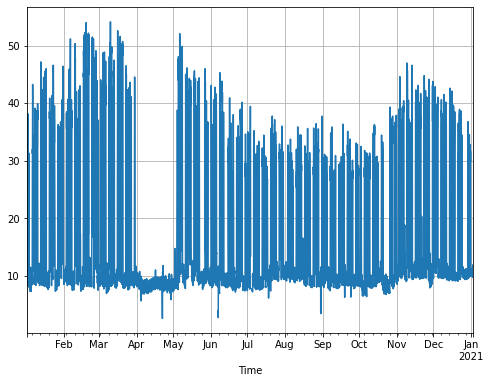

In [ ]:
load_data.plot(grid=True)

<Axes: xlabel='Time'>

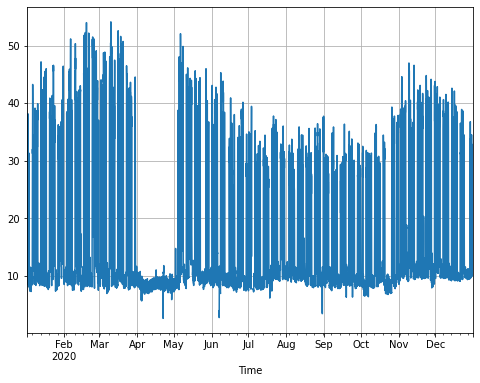

In [ ]:
df_2020 = df['2020']
load_data_2020 = df_2020['Mean_Load']
load_data_2020.plot(grid=True)

In [ ]:
df[df['Month']==3]

,Month,Mean_Load
Time,,
2020-03-01 00:00:00,3,10.203950
2020-03-01 01:00:00,3,10.158117
2020-03-01 02:00:00,3,9.927317
2020-03-01 03:00:00,3,9.868483
2020-03-01 04:00:00,3,9.766383
...,...,...
2020-03-31 19:00:00,3,9.284133
2020-03-31 20:00:00,3,9.271733
2020-03-31 21:00:00,3,8.959567


In [ ]:
df

,Month,Mean_Load
Time,,
2020-01-01 19:00:00,1,9.855870
2020-01-01 20:00:00,1,9.803250
2020-01-01 21:00:00,1,11.166733
2020-01-01 22:00:00,1,11.400533
2020-01-01 23:00:00,1,10.381850
...,...,...
2021-01-02 15:00:00,1,11.339983
2021-01-02 16:00:00,1,11.961717
2021-01-02 17:00:00,1,11.015783


In [ ]:
import plotly.express as px
fig = px.line(df_non_index, x='Time', y='Mean_Load', title = 'Time VS Load')

fig.update_xaxes(rangeslider_visible=True)
fig.show()

Group by Months

In [ ]:
df.groupby('Month').agg({'Mean_Load':['min','max']})

Mean_Load           
            min        max
Month                     
1      7.311267  47.193267
2      7.355867  54.007783
3      6.966267  54.140333
4      2.643167  11.809400
5      7.283567  52.082867
6      2.780400  45.321333
7      6.171933  39.462317
8      3.463867  37.757333
9      6.335067  36.377967
10     6.418800  39.340483
11     7.940367  46.998900
12     9.086217  42.885600

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

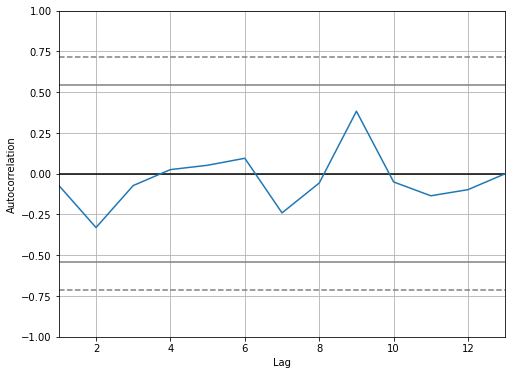

In [ ]:
pd.plotting.autocorrelation_plot(df['Mean_Load'].resample("1m").mean())

In [ ]:
df['Mean_Load'].resample("1m").mean()

Time
2020-01-31    18.336361
2020-02-29    19.910790
2020-03-31    19.491131
2020-04-30     8.254760
2020-05-31    15.798827
2020-06-30    16.248740
2020-07-31    16.019696
2020-08-31    16.076558
2020-09-30    15.289685
2020-10-31    13.992299
2020-11-30    18.737633
2020-12-31    17.112862
2021-01-31    10.540870
Freq: M, Name: Mean_Load, dtype: float64

Stationary Test

In [ ]:
df

,Month,Mean_Load
Time,,
2020-01-01 19:00:00,1,9.855870
2020-01-01 20:00:00,1,9.803250
2020-01-01 21:00:00,1,11.166733
2020-01-01 22:00:00,1,11.400533
2020-01-01 23:00:00,1,10.381850
...,...,...
2021-01-02 15:00:00,1,11.339983
2021-01-02 16:00:00,1,11.961717
2021-01-02 17:00:00,1,11.015783


In [ ]:
from statsmodels.tsa.stattools import kpss

In [ ]:
df_non_index.dropna(inplace=True)

In [ ]:
df_non_index

,Time,Month,Mean_Load
0,2020-01-01 19:00:00,1,9.855870
1,2020-01-01 20:00:00,1,9.803250
2,2020-01-01 21:00:00,1,11.166733
3,2020-01-01 22:00:00,1,11.400533
4,2020-01-01 23:00:00,1,10.381850
...,...,...,...
8804,2021-01-02 15:00:00,1,11.339983
8805,2021-01-02 16:00:00,1,11.961717
8806,2021-01-02 17:00:00,1,11.015783
8807,2021-01-02 18:00:00,1,10.625717


In [ ]:
import plotly.express as px
fig = px.line(df_non_index, x='Time', y='Mean_Load', title = 'Time VS Load')

fig.update_xaxes(rangeslider_visible=True)
fig.show()

In [ ]:
df_non_index.isna().any()

Time         False
Month        False
Mean_Load    False
dtype: bool

In [ ]:
df = df_non_index.set_index('Time')
df_2020 = df.loc['2020']

In [ ]:
df_2020.isna().any()

Month        False
Mean_Load    False
dtype: bool

In [ ]:
df_2020

,Month,Mean_Load
Time,,
2020-01-01 19:00:00,1,9.855870
2020-01-01 20:00:00,1,9.803250
2020-01-01 21:00:00,1,11.166733
2020-01-01 22:00:00,1,11.400533
2020-01-01 23:00:00,1,10.381850
...,...,...
2020-12-31 19:00:00,12,10.489567
2020-12-31 20:00:00,12,10.448850
2020-12-31 21:00:00,12,10.464600


In [ ]:
df_2020.drop(columns=['Month'], inplace= True)
df_2020

,Mean_Load
Time,
2020-01-01 19:00:00,9.855870
2020-01-01 20:00:00,9.803250
2020-01-01 21:00:00,11.166733
2020-01-01 22:00:00,11.400533
2020-01-01 23:00:00,10.381850
...,...
2020-12-31 19:00:00,10.489567
2020-12-31 20:00:00,10.448850
2020-12-31 21:00:00,10.464600


In [ ]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 25.7 MB/s eta 0:00:00


In [ ]:

from pmdarima.arima import auto_arima


# use auto_arima to find the best parameters for an ARIMA model
model = auto_arima(df_2020, seasonal=False, stepwise=True, suppress_warnings=True)

# use the model to make predictions for the entire dataset
predictions = model.predict_in_sample()

# create a new column called 'predicted' with the predicted values
df_2020['predicted'] = predictions

# print the last 5 rows of the data
df_2020.tail()


,Mean_Load,predicted
Time,,
2020-12-31 19:00:00,10.489567,9.805452
2020-12-31 20:00:00,10.448850,10.598741
2020-12-31 21:00:00,10.464600,10.012748
2020-12-31 22:00:00,11.016117,10.113226
2020-12-31 23:00:00,10.273583,11.690687


In [ ]:
df_2020.reset_index()

,Time,Mean_Load,predicted
0,2020-01-01 19:00:00,9.855870,0.000000
1,2020-01-01 20:00:00,9.803250,9.855943
2,2020-01-01 21:00:00,11.166733,9.778087
3,2020-01-01 22:00:00,11.400533,11.831784
4,2020-01-01 23:00:00,10.381850,11.474006
...,...,...,...
8716,2020-12-31 19:00:00,10.489567,9.805452
8717,2020-12-31 20:00:00,10.448850,10.598741
8718,2020-12-31 21:00:00,10.464600,10.012748
8719,2020-12-31 22:00:00,11.016117,10.113226


In [ ]:
fig = px.line(df_2020.reset_index(), x='Time', y=['Mean_Load','predicted'], title = 'Time VS Load')

fig.update_xaxes(rangeslider_visible=True)
fig.show()

In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np

# calculate mean squared error
mse = mean_squared_error(df_2020['Mean_Load'], df_2020['predicted'])
print('MSE:', mse)

# calculate root mean squared error
rmse = np.sqrt(mse)
print('RMSE:', rmse)

MSE: 11.764870003015002
RMSE: 3.429995627258875


In [ ]:
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 8721
Model:               SARIMAX(3, 1, 2)   Log Likelihood              -23117.831
Date:                Sat, 18 Mar 2023   AIC                          46247.662
Time:                        13:34:15   BIC                          46290.102
Sample:                             0   HQIC                         46262.126
                               - 8721                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4854      0.007     68.669      0.000       0.472       0.499
ar.L2         -0.9901      0.003   -385.085      0.000      -0.995      -0.985
ar.L3          0.4812      0.006     77.355      0.0

The result is the output of a SARIMAX model. SARIMAX stands for Seasonal AutoRegressive Integrated Moving Average with eXogenous regressors, and is an extension of the ARIMA model.

The coefficients for the autoregressive terms (ar.L1, ar.L2, ar.L3) are all statistically significant with p-values less than 0.05. This suggests that the previous values of the dependent variable are useful in predicting future values. Specifically, there appears to be positive correlation with the value 1 step in the past, and negative correlation with the value 2 steps in the past, and positive correlation with the value 3 steps in the past.

The coefficients for the moving average terms (ma.L1, ma.L2) are also statistically significant with p-values less than 0.05. This suggests that the error terms in the previous 2 periods have a relationship with the error term in the current period.

The value of sigma^2 (11.87) is the estimated variance of the error term. The Ljung-Box test statistic (Q) is a measure of autocorrelation in the residuals, and the p-value of 0.11 indicates that there may be some remaining autocorrelation.

The JB statistic is a test of whether the residuals are normally distributed, and the p-value of 0.00 indicates that the residuals are not normally distributed. The Heteroskedasticity (H) test is a test of whether the variance of the residuals is constant over time, and the p-value of 0.00 indicates that there is evidence of heteroskedasticity in the residuals.

Overall, the model appears to fit the data reasonably well, but there may be some remaining issues with autocorrelation and non-normality in the residuals. Further analysis and modeling may be necessary to improve the accuracy of predictions.

In [ ]:
# SAVING THE MODEL


import pickle

# save the model to a file
with open('arima_model.pkl', 'wb') as file:
    pickle.dump(model, file)


In [ ]:


# # load the model from the file
# with open('arima_model.pkl', 'rb') as file:
#     model = pickle.load(file)

# # create some sample data
# sample_dates = pd.date_range(start='2023-03-16 00:00:00', end='2023-03-20 23:00:00', freq='H')
# sample_data = pd.DataFrame({'Time': sample_dates, 'Mean_Load': np.random.rand(len(sample_dates))})

# # set the 'Time' column as the index
# sample_data = sample_data.set_index('Time')

# # make predictions using the loaded model
# predictions = model.predict(sample_data.index)

# # create a new column called 'predicted' with the predicted values
# sample_data['predicted'] = predictions

# # print the sample data with predictions
# print(sample_data)


ITERATION 2

In [ ]:
df_2020.drop(columns=['predicted'], inplace=True)

In [ ]:
df_2020

,Mean_Load
Time,
2020-01-01 19:00:00,9.855870
2020-01-01 20:00:00,9.803250
2020-01-01 21:00:00,11.166733
2020-01-01 22:00:00,11.400533
2020-01-01 23:00:00,10.381850
...,...
2020-12-31 19:00:00,10.489567
2020-12-31 20:00:00,10.448850
2020-12-31 21:00:00,10.464600


In [ ]:
# testing for stationarity

from pmdarima.arima import ADFTest
adf_test = ADFTest(alpha = 0.05)
adf_test.should_diff(df_2020)

(0.01, False)

From the above, we can conclude that the data is non-stationary. Hence, we would need to use the “Integrated (I)” concept, denoted by value ‘d’ in time series to make the data stationary while building the Auto ARIMA model.

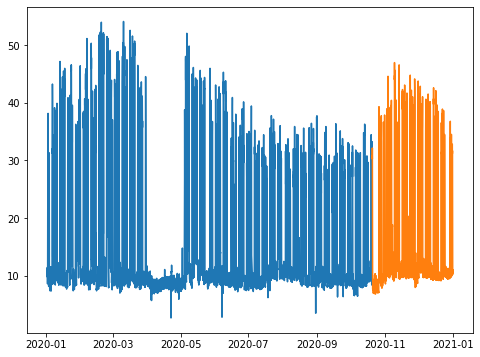

In [ ]:
train = df_2020[:6978]
test = df_2020[6978:]

plt.plot(train)
plt.plot(test)

In [ ]:
arima_model = auto_arima(train, start_p=0, start_q=0,
                         max_p=5, max_d=5, max_q=5,
                         D=1, start_Q=0, max_P=5, max_D=5,
                         max_Q=5, m=12, seasonal=True,
                         error_action='warn', trace=True,
                         suppress_warnings=True, stepwise=True,
                         random_state=20, n_fits=5)

NameError: ignored

In [ ]:
arima_model.summary()

In [ ]:
prediction = pd.DataFrame(arima_model.predict(n_periods=20), index=test.index)
prediction.columns = ['predicted']
prediction

In [ ]:
from sklearn.metrics import r2_score
test['predicted'] = prediction
r2_score(test['Mean_Load'], test['predicted'])

In [ ]:
colab-jupyter.log

In [ ]:
from google.colab import drive
drive.mount('/content/drive')